Andy Huynh Homework 2

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [52]:
df = pd.read_csv("possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [53]:
df['popnum'] = df['Pop'].replace(['Vic'],
                        [0], inplace=False)

df['sexnum'] = df['sex'].replace(['m','f'],
                        [0,1], inplace=False)

df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,popnum,sexnum
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,1


In [54]:
df.corr()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sexnum
case,1.000000,0.970353,-0.194525,-0.209177,-0.125065,-0.334329,0.315351,-0.782368,-0.773727,-0.084078,-0.402303,-0.211671,-0.253980
site,0.970353,1.000000,-0.131423,-0.163646,-0.083548,-0.260843,0.380444,-0.783009,-0.790716,-0.036987,-0.345494,-0.175266,-0.232817
age,-0.194525,-0.131423,1.000000,0.319022,0.285107,0.260280,0.118241,0.126190,0.053405,0.235553,0.334209,0.354298,0.064442
hdlngth,-0.209177,-0.163646,0.319022,1.000000,0.710827,0.691094,0.287429,0.391605,0.121463,0.347175,0.631498,0.562663,-0.107200
skullw,-0.125065,-0.083548,0.285107,0.710827,1.000000,0.526413,0.255921,0.275059,-0.000537,0.321991,0.629737,0.451838,-0.080014
totlngth,-0.334329,-0.260843,0.260280,0.691094,0.526413,1.000000,0.565646,0.444832,0.154484,0.247786,0.577890,0.519465,0.160200
taill,0.315351,0.380444,0.118241,0.287429,0.255921,0.565646,1.000000,-0.126277,-0.385136,0.198134,0.174997,0.294493,0.040917
footlgth,-0.782368,-0.783009,0.126190,0.391605,0.275059,0.444832,-0.126277,1.000000,0.783050,0.005213,0.450590,0.302584,0.123820
earconch,-0.773727,-0.790716,0.053405,0.121463,-0.000537,0.154484,-0.385136,0.783050,1.000000,-0.165092,0.199230,0.066527,0.091559
eye,-0.084078,-0.036987,0.235553,0.347175,0.321991,0.247786,0.198134,0.005213,-0.165092,1.000000,0.149338,0.235716,-0.188371


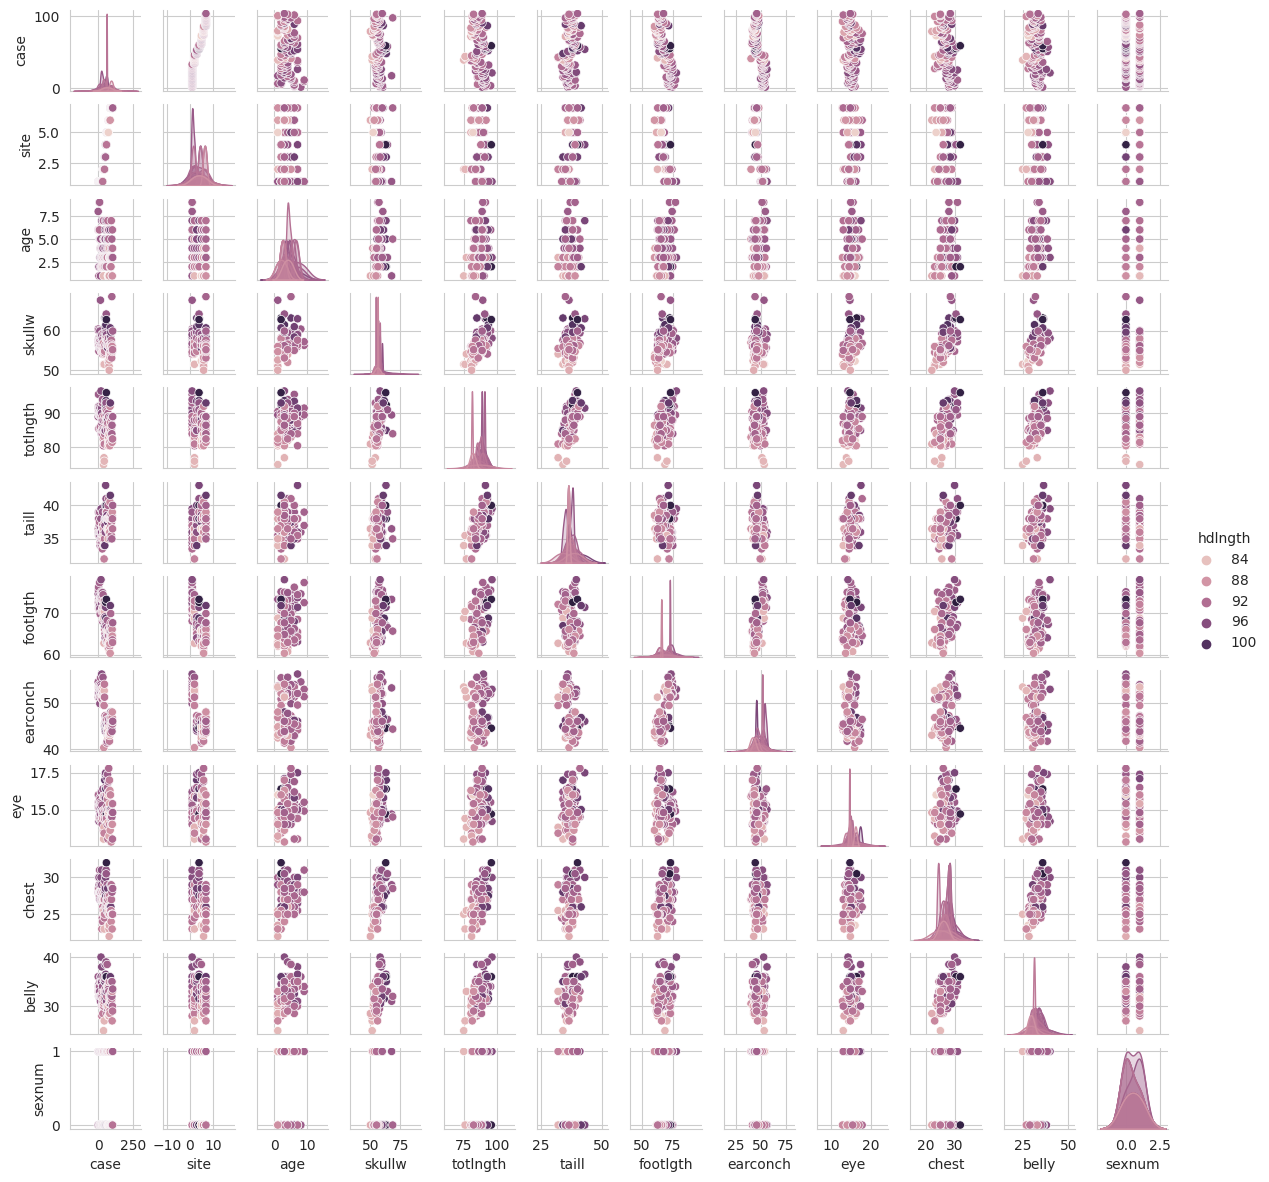

In [55]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="hdlngth",height=1)

Question 1 & 2

In [68]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

/workspace/.pyenv_mirror/user/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

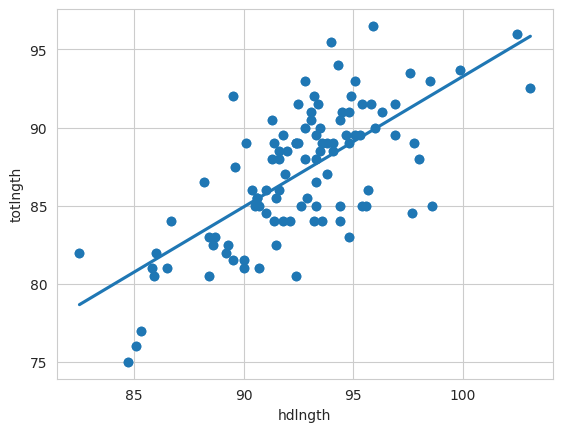

In [56]:
plt.scatter(df['hdlngth'], df['totlngth'])
sns.regplot(df['hdlngth'], df['totlngth'], ci=None)

In [57]:
df_male = df.loc[df['sex'] == 'm']
df_female = df.loc[df['sex'] == 'f']

In [58]:
x_male = df_male['hdlngth']
y_male = df_male['totlngth']
x_female = df_female['hdlngth']
y_female = df_female['totlngth']

<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

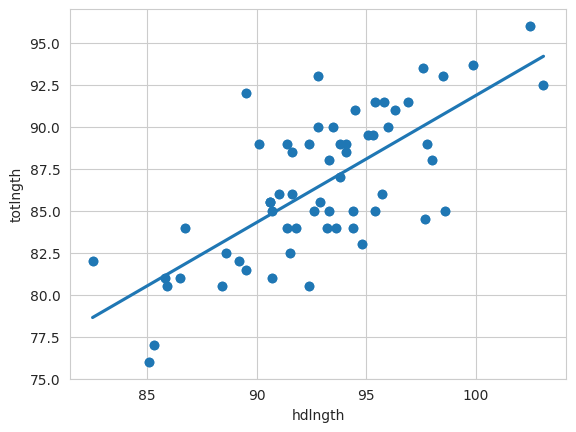

In [59]:
plt.scatter(x_male, y_male)
sns.regplot(x_male, y_male, ci=None)

<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

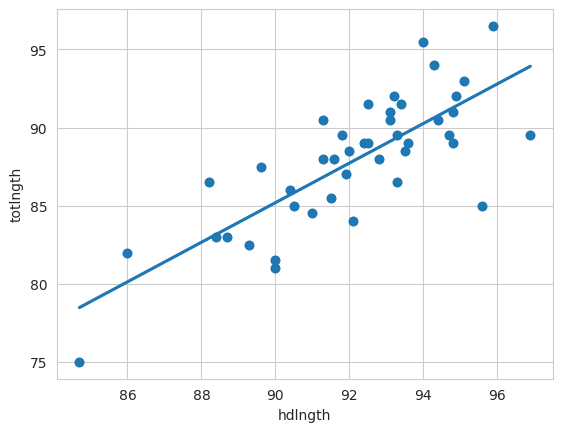

In [60]:
plt.scatter(x_female, y_female)
sns.regplot(x_female, y_female, ci=None)

Question 3

In [61]:
df = df.dropna()

In [62]:
df.head

<bound method NDFrame.head of      case  site    Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0       1     1    Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1       2     1    Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2       3     1    Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3       4     1    Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4       5     1    Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   
..    ...   ...    ...  ..  ...      ...     ...       ...    ...       ...   
99    100     7  other   m  1.0     89.5    56.0      81.5   36.5      66.0   
100   101     7  other   m  1.0     88.6    54.7      82.5   39.0      64.4   
101   102     7  other   f  6.0     92.4    55.0      89.0   38.0      63.5   
102   103     7  other   m  4.0     91.5    55.2      82.5   36.5      62.9   
103   104     7  other   f  3.0     93.6    59.9      89.0   40.0      67.6   

     earconch   eye  

In [69]:
train, test=train_test_split(df, test_size=0.2,random_state=0)
x_train = train[['hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y_train = train['totlngth'].values

x_test = test[['hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y_test = test['totlngth'].values

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [ ]:
print(lasso.coef_)

[ 0.40603389  0.01766472  1.03680197  0.33887332 -0.00992912  0.
  0.02766717  0.01466936]


In [ ]:
from sklearn.model_selection import train_test_split

train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['totlngth']].values
y = train['hdlngth'].values
y_num = train['hdlngth'].values

test_x = test[['totlngth']].values
test_y = test['hdlngth'].values
test_y_num = test['hdlngth'].values

print(test_y_num)

[98.6 86.7 93.3 95.6 90.5 94.8 93.3 91.5 94.3 95.7 89.6 95.4 99.9 96.3
 88.7 91.  90.4 94.1 95.1 86.5 93.2]


from sklearn.model_selection import train_test_split

train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['totlngth', 'taill', 'skullw', 'footlgth', 'earconch', 'chest', 'belly']].values
y = train['hdlngth'].values
y_num = train['hdlngth'].values

test_x = test[['totlngth', 'taill', 'skullw', 'footlgth', 'earconch', 'chest', 'belly']].values
test_y = test['hdlngth'].values
test_y_num = test['hdlngth'].values

print(test_y_num)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=.1)
lasso.fit(x, y_num)

Lasso(alpha=0.1)

In [ ]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

In [ ]:
print(lasso.coef_)

[0.57238866]


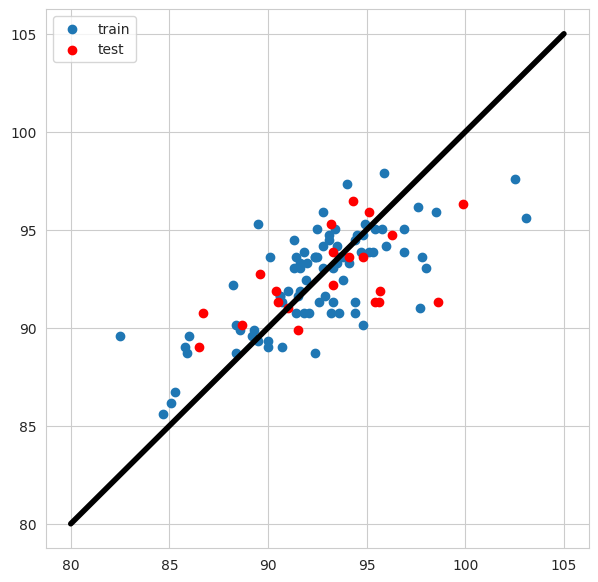

In [ ]:
plt.figure(figsize=(7,7))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y_num,lasso_test,color='r', label='test')
plt.plot([80,105],[80,105],lw=4,color='black')
plt.legend()

(array([ 4.,  6., 21., 33., 22., 10.,  3.,  3.,  0.,  2.]),
 array([50.  , 51.86, 53.72, 55.58, 57.44, 59.3 , 61.16, 63.02, 64.88,
        66.74, 68.6 ]),
 <BarContainer object of 10 artists>)

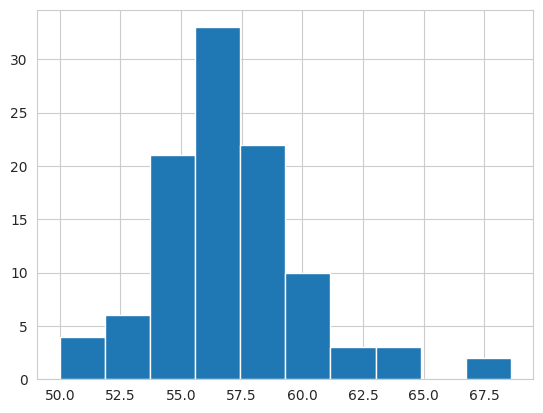

In [ ]:
plt.hist(df['skullw'])

Question 4 & 5

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [72]:
df = pd.read_csv("possum.csv")
df['popnum'] = df['Pop'].replace(['Vic'],
                        [0], inplace=False)

df['sexnum'] = df['sex'].replace(['m','f'],
                        [0,1], inplace=False)

df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,popnum,sexnum
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,1


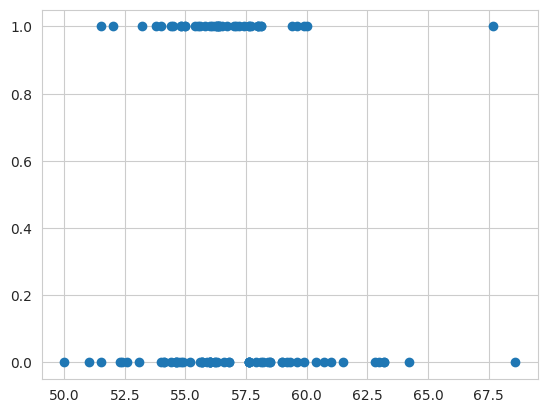

In [73]:
plt.scatter(df["skullw"], df["sexnum"])

In [74]:
x_train,x_test,y_train,y_test=train_test_split(df["skullw"],df["sexnum"],test_size=0.2,random_state=0)

In [75]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [76]:
logreg = LogisticRegression()

In [77]:
logreg.fit(x_train,y_train)


LogisticRegression()

In [78]:
from scipy.special import expit

In [79]:
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_

sigmoid = expit(y_line)

Text(0, 0.5, 'Sex Number')

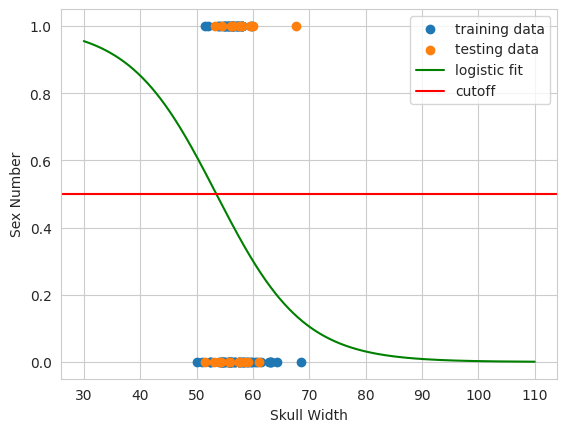

In [80]:
plt.scatter(x_train, y_train, label="training data")
plt.scatter(x_test, y_test, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("Skull Width")
plt.ylabel("Sex Number")

In [99]:
y_pred = logreg.predict(x_test)

In [100]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-1.1000000000000005
0.5238095238095238


In [101]:
from sklearn import metrics

In [102]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print (conf_matrix)

[[9 2]
 [9 1]]


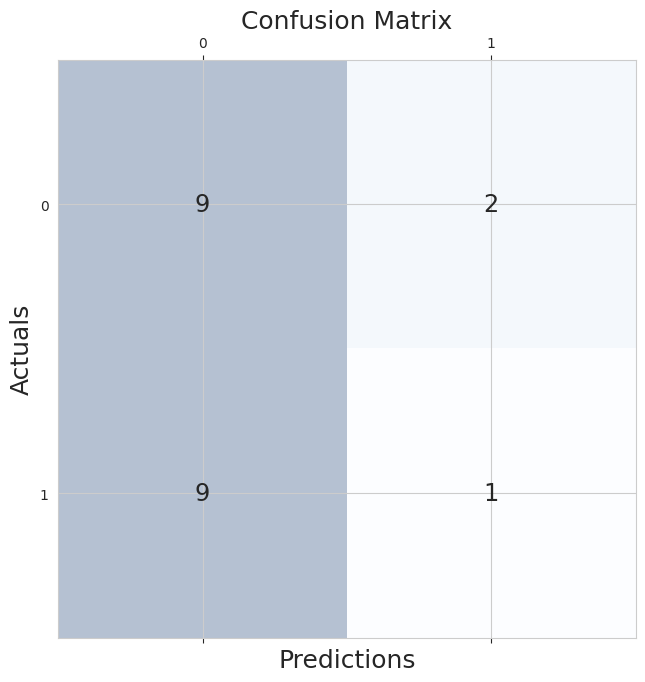

In [103]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [104]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.47619047619047616
Precision: 0.3333333333333333
Recall: 0.1


In [84]:
from sklearn.neighbors import KNeighborsRegressor

In [85]:
a = train[['skullw']].values
b = train['sexnum'].values
b_num = train['sexnum'].values

test_a = test[['skullw']].values
test_b = test['sexnum'].values
test_b_num = test['sexnum'].values

In [86]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(a, b_num)

KNeighborsRegressor(n_neighbors=3)

In [87]:
knn_train=knn.predict(a)
knn_test=knn.predict(test_a)

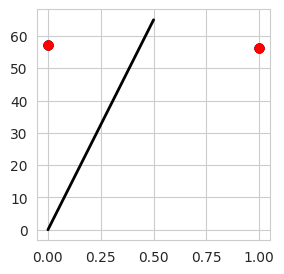

In [ ]:
plt.figure(figsize=(3,3))

plt.scatter(b_num,knn_train)
plt.scatter(test_b_num,knn_test,color='r')
plt.plot([0,.5],[0,65],lw=2,color='black')

In [88]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [89]:
print("Train error",mean_squared_error(b_num,knn_train))
print("Train R-sq",r2_score(b_num,knn_train))

print("\nTest error",mean_squared_error(test_b_num,knn_test))
print("Test R-sq",r2_score(test_b_num,knn_test))

Train error 0.1652777777777778
Train R-sq 0.32367149758454095

Test error 0.3333333333333333
Test R-sq -0.41346153846153877


In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,popnum,sexnum
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,1


Question 6, 7, & 8

In [ ]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,popnum,sexnum
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,1


In [ ]:
train, test=train_test_split(df,test_size=0.2,random_state=1010)

u = train[['sexnum']].values
v = train['site'].values
v_num = train['site'].values

test_u = test[['sexnum']].values
test_v = test['site'].values
test_v_num = test['site'].values

lasso = Lasso(alpha=.1)
lasso.fit(u, v_num)

lasso_train= lasso.predict(u)
lasso_test= lasso.predict(test_u)

In [ ]:
print(lasso.coef_)

[-0.79782878]


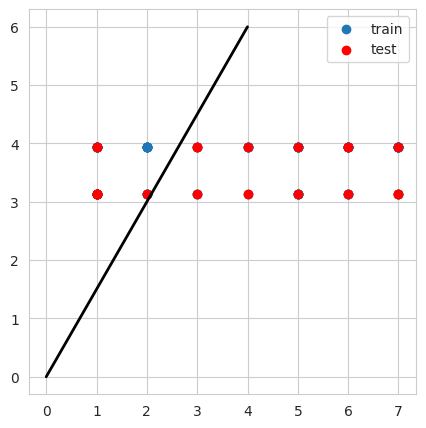

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(v_num,lasso_train, label='train')
plt.scatter(test_v_num,lasso_test,color='r', label='test')
plt.plot([0,4],[0,6],lw=2,color='black')
plt.legend()

In [ ]:
j = train[['skullw']].values
k = train['site'].values
k_num = train['site'].values

test_j = test[['skullw']].values
test_k = test['site'].values
test_k_num = test['site'].values

In [ ]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(j, k_num)

In [ ]:
knn_train=knn.predict(j)
knn_test=knn.predict(test_j)

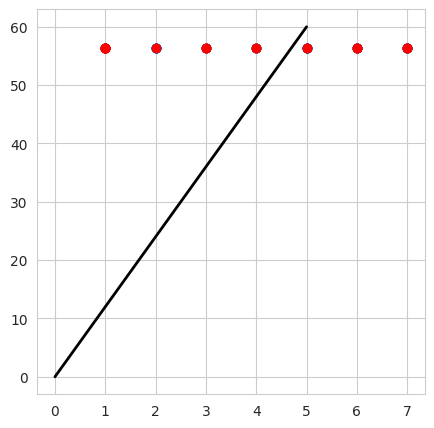

In [ ]:
plt.figure(figsize=(5,5))

plt.scatter(k_num,knn_train)
plt.scatter(test_k_num,knn_test,color='r')
plt.plot([0,5],[0,60],lw=2,color='black')

1) I made a scatter plot head length and total length, the method is able help vizualize the data, but you cant tell whether the data is from a male or female possum. The line is also doesn't really fit the data
2) After splitting the data sets up, it is clear that the female possum data matches the line better than the male possum data. This was not possible to tell in the first graph.

3) Tail, Foot length, Chest

4) The K Nearest Neighbors (KNN) method is easier to visualize than logistic regression
5) The matrices is saying that 9 and 1 times its right (top left and bottom right), 9 and 2 times its wrong (bottom left and top right)

6) Lasso
7) Line of best fit, and what axis you choose for the graph
8) Probably